# Using MNIST handwritten data to produce a basic Neural network for hand digit recognition#
Over time, I will be implementing other neural network architectures in order to practice optimization techniques.
The current neural network is a simple sequential neural network using keras with a tensorflow backend. Future plans include implementing dropout and if possible, principal component analysis and singular value decomposition

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Original way of loading the data
'''
test_path = "./mnist_test.csv"
train_path = "./mnist_train.csv"
d0 = pd.read_csv("./mnist_train.csv")
d1 = pd.read_csv(test_path)

#labelling data
train_label = d0['label'].to_numpy()
train_data = d0.drop('label', axis = 1).to_numpy()
test_label = d1['label'].to_numpy()
test_data = d1.drop('label', axis = 1).to_numpy()

'''

'\ntest_path = "./mnist_test.csv"\ntrain_path = "./mnist_train.csv"\nd0 = pd.read_csv("./mnist_train.csv")\nd1 = pd.read_csv(test_path)\n\n#labelling data\ntrain_label = d0[\'label\'].to_numpy()\ntrain_data = d0.drop(\'label\', axis = 1).to_numpy()\ntest_label = d1[\'label\'].to_numpy()\ntest_data = d1.drop(\'label\', axis = 1).to_numpy()\n\n'

In [2]:
#Normalizing data 
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Basic model
Architecture:
    - Dense 128 layer with relu activation x 2
    - 10 output softmax layer x 1
    - Adam optimizer
    - Categorical_crossentropy loss function (I found this to work better than sparse_categorical_crossentropy)

In [3]:
b_model = tf.keras.models.Sequential()
b_model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
b_model.add(tf.keras.layers.Dense(units = 128, activation = tf.nn.relu)) #all the neurons are connected with the previous layer
b_model.add(tf.keras.layers.Dense(units = 128, activation = tf.nn.relu))
b_model.add(tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax))

In [4]:
b_model.compile(optimizer='adam', loss='categorical_crossentropy', metric=['accuracy'])

In [5]:
b_model.fit(x_train, tf.keras.utils.to_categorical(y_train), epochs = 10)

b_model.save('basic model')

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2607
Epoch 2/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1061
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0736
Epoch 4/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0538
Epoch 5/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0415
Epoch 6/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0319
Epoch 7/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0260
Epoch 8/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0198
Epoch 9/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0188
Epoch 10/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0167
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow

# Tests for the basic network

Computer guess is a 2


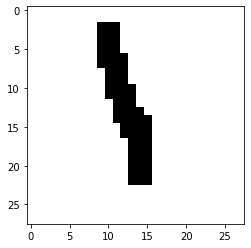

Computer guess is a 6


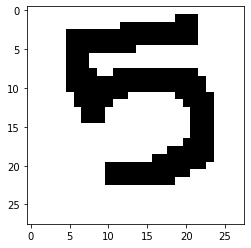

Computer guess is a 3


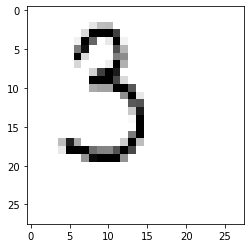

Computer guess is a 3


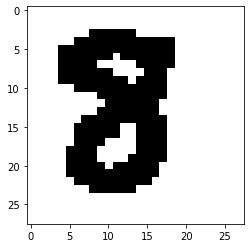

Computer guess is a 6


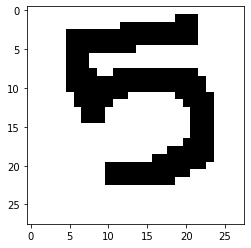

In [6]:
for x in range(1,6):
    img = cv.imread("{}.png".format(x))[:,:,0]
    img = np.invert(np.array([img]))
    prediction = b_model.predict(img)
    print("Computer guess is a {}".format(np.argmax(prediction)))
    plt.imshow(img[0], cmap = plt.cm.binary)
    plt.show()

The predictions up above show a rather inaccurate estimate. The computer tends to get mixed up between 8's and 3's, 5's and 6's. However when put against the test cases, the network does very well. Below shows the predictions when put against the test cases. You can adjust the number of test cases you want to compare it with to see accuracy over a larger group of numbers.

In [15]:
num_to_test = 20

predictions = b_model.predict(x_test[:num_to_test])

print("Predicted:     ", np.argmax(predictions, axis=1))
print("True y labels: ", y_test[:num_to_test])

Predicted:      [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
True y labels:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


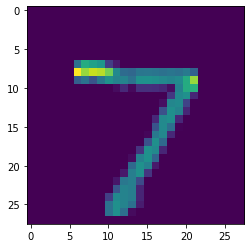

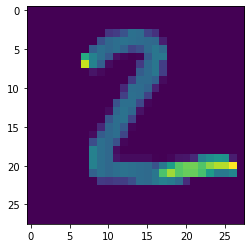

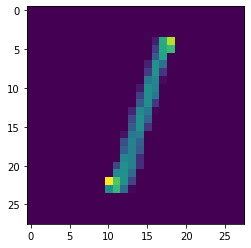

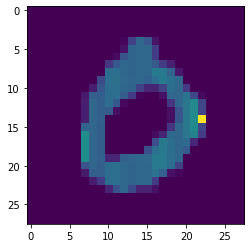

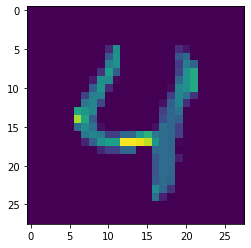

In [16]:
for i in range(5):
    first_image = x_test[i]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28,28))
    plt.imshow(pixels)
    plt.show()